# Plot different time trends (for number of bacteria in cecum, short chain fatty acid etc)

In [5]:
# import needed packages
import pandas as pd
import numpy as np
import os
import scipy
import pickle
from mpl_toolkits.axes_grid1 import make_axes_locatable
import matplotlib as mpl
mpl.rcParams['pdf.fonttype'] = 42
mpl.rcParams['ps.fonttype'] = 42

#....
from matplotlib import ticker

#import ffmpeg
import scipy.interpolate
import matplotlib.pyplot as plt
import matplotlib.colors
from mpl_toolkits.axes_grid1 import make_axes_locatable
#import scipy.integrate as spi
#from scipy.integrate import odeint #this is the module to solve ODEs
%matplotlib inline
foldername_data="data_simpleformat"
foldername_kymograph="data_kymographs"

foldername_outbase="plot_outputs"
if not os.path.exists(foldername_outbase):
               os.makedirs(foldername_outbase)     

# plot simulations SCFA for different simulations

26_3_SCFA


D       1.000000e-08
M1      1.000000e+00
time    6.008333e+01
c2      2.064624e-02
c3      1.637098e-03
c4      1.084445e-02
dtype: float64

,D,M1,time,c4
0,1.000000e-08,1,0.000000,5.477483e-08
1,1.000000e-08,1,0.166667,4.376986e-07
2,1.000000e-08,1,0.333333,4.443878e-07
3,1.000000e-08,1,0.500000,4.471006e-07
4,1.000000e-08,1,0.666667,4.470733e-07
...,...,...,...,...
428,1.000000e-08,1,71.333333,5.845453e-07
429,1.000000e-08,1,71.500000,6.077813e-07
430,1.000000e-08,1,71.666667,6.341262e-07
431,1.000000e-08,1,71.833333,6.575311e-07


26_4_SCFA


D        0.000001
M1       1.000000
time    60.083333
c2       0.008678
c3       0.003041
c4       0.020555
dtype: float64

,D,M1,time,c4
0,0.000001,1,0.000000,2.992676e-07
1,0.000001,1,0.166667,4.545515e-07
2,0.000001,1,0.333333,4.666629e-07
3,0.000001,1,0.500000,4.776562e-07
4,0.000001,1,0.666667,4.880026e-07
...,...,...,...,...
428,0.000001,1,71.333333,1.079609e-06
429,0.000001,1,71.500000,1.093859e-06
430,0.000001,1,71.666667,1.096889e-06
431,0.000001,1,71.833333,1.100017e-06


26_5_SCFA


D       1.000000e-08
M1      1.000000e+00
time    3.608333e+01
c2      2.070313e-02
c3      1.630063e-03
c4      6.287601e-03
dtype: float64

,D,M1,time,c4
0,1.000000e-08,1,0.000000,2.756004e-08
1,1.000000e-08,1,0.166667,8.133290e-07
2,1.000000e-08,1,0.333333,1.183746e-06
3,1.000000e-08,1,0.500000,1.265551e-06
4,1.000000e-08,1,0.666667,1.275127e-06
...,...,...,...,...
284,1.000000e-08,1,47.333333,9.168751e-07
285,1.000000e-08,1,47.500000,9.477520e-07
286,1.000000e-08,1,47.666667,9.826368e-07
287,1.000000e-08,1,47.833333,1.020904e-06


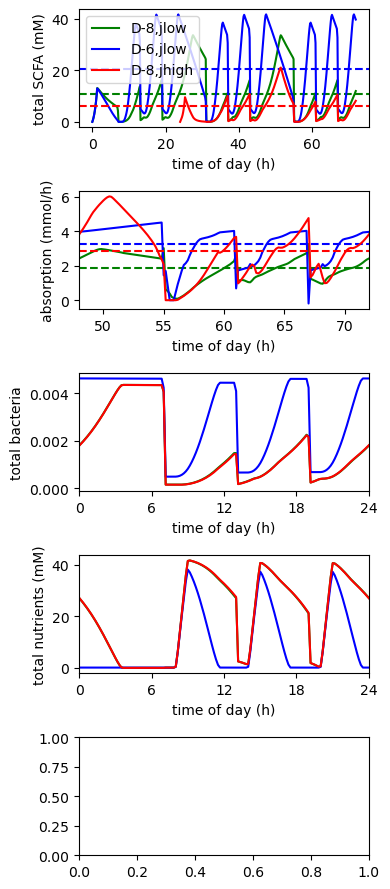

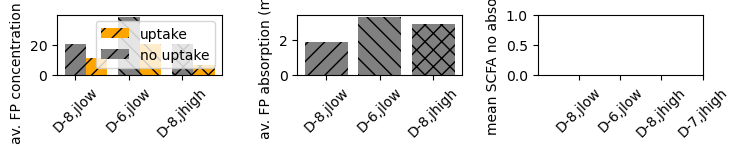

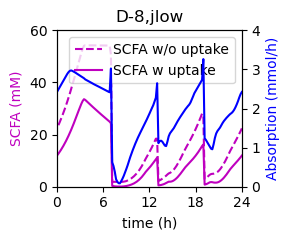

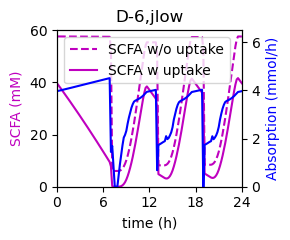

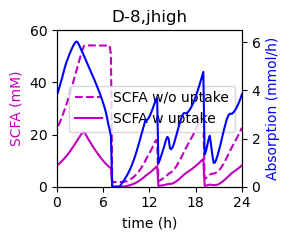

In [6]:

#different SCFA simuations
name_runs=["26_3_SCFA","26_4_SCFA","26_5_SCFA"]#,"26_7_SCFA"]
name_runs_simple=["D-8,jlow","D-6,jlow","D-8,jhigh","D-7,jhigh"]
fig2, ax2 = plt.subplots(5,1,figsize=(4,1.8*5)) # its for the plots: 1 row and 3 panels in 1 row (figure size in cm)

figbar, axbar = plt.subplots(1,3,figsize=(3*2.5,1.6)) # its for the plots: 1 row and 3 panels in 1 row (figure size in cm)
axbar[2].set_ylabel("mean SCFA no absorption")
axbar[0].set_ylabel("av. FP concentration (mmol)")
axbar[1].set_ylabel("av. FP absorption (mmol/h)")

axbar[0].set_xticks([1,2,3,4])
axbar[1].set_xticks([1,2,3,4])
axbar[2].set_xticks([1,2,3,4])
axbar[0].set_xticklabels(name_runs_simple,rotation=45)
axbar[1].set_xticklabels(name_runs_simple,rotation=45)
axbar[2].set_xticklabels(name_runs_simple,rotation=45)

hatchl=["//","\\\\","xx","xx"]
colorlist=["g","b","r","m"]
nc=-1
for name in name_runs:
        if name in ["26_7_SCFA","26_5_SCFA"]:
            delta0=24
        else:
            delta0=0
        fig3, ax3 = plt.subplots(1,1,figsize=(3,2.5)) # its for the plots: 1 row and 3 panels in 1 row (figure size in cm)
        
        
        ax3t=ax3.twinx()
        ax3.set_xlabel("time (h)")
        ax3.set_ylabel("SCFA (mM)",color='m')
        ax3t.set_ylabel("Absorption (mmol/h)",color='b')
        ax3t.set_ylim(0,6.5)
        if name=="26_3_SCFA":
            ax3t.set_ylim(0,4)
        ax3.set_ylim(0,60)
        nc=nc+1
        #load data
        name_withoutsimple=name
        print(name_withoutsimple)
        systemsvarfolder="data_fromcomsol/systems_variables"
        if "SCFA" in name:
            #fix later
            names=["D","M1","time","c2","c3","c4"]
            #influx=pd.read_csv(os.path.join(systemsvarfolder,name_withoutsimple+"_Influx_c2_c3_c4.txt"), delim_whitespace=True,skiprows=5,names=names,index_col=False)
            #outflux=pd.read_csv(os.path.join(systemsvarfolder,name_withoutsimple+"_Outflux_c2_c3_c4.txt"), delim_whitespace=True,skiprows=5,names=names,index_col=False)
            total=pd.read_csv(os.path.join(systemsvarfolder,name_withoutsimple+"_Total_c2_c3_c4.txt"), delim_whitespace=True,skiprows=5,names=names,index_col=False)    
            names_abs=["D","M1","time","c4"]
            absorption=pd.read_csv(os.path.join(systemsvarfolder,name_withoutsimple+"_Absorption.txt"), delim_whitespace=True,skiprows=5,names=names_abs,index_col=False)
        elif name in ["26_12","26_13"]:   
            names=["D","time","c2","c3"]
            #influx=pd.read_csv(os.path.join(systemsvarfolder,name_withoutsimple+"_Influx_c2_c3.txt"), delim_whitespace=True,skiprows=5,names=names,index_col=False)
            #outflux=pd.read_csv(os.path.join(systemsvarfolder,name_withoutsimple+"_Outflux_c2_c3.txt"), delim_whitespace=True,skiprows=5,names=names,index_col=False)
            total=pd.read_csv(os.path.join(systemsvarfolder,name_withoutsimple+"_Total_c2_c3.txt"), delim_whitespace=True,skiprows=5,names=names,index_col=False)
            total_CECUM=pd.read_csv(os.path.join(systemsvarfolder,name_withoutsimple+"_Total_In_Cecum_c2_c3.txt"), delim_whitespace=True,skiprows=5,names=names,index_col=False)
        else:       
            ERROR
            #names=["D","M1","time","c2","c3"]
            #influx=pd.read_csv(os.path.join(systemsvarfolder,name_withoutsimple+"_Influx_c2_c3.txt"), delim_whitespace=True,skiprows=5,names=names,index_col=False)
            #outflux=pd.read_csv(os.path.join(systemsvarfolder,name_withoutsimple+"_Outflux_c2_c3.txt"), delim_whitespace=True,skiprows=5,names=names,index_col=False)
            #total=pd.read_csv(os.path.join(systemsvarfolder,name_withoutsimple+"_Total_c2_c3.txt"), delim_whitespace=True,skiprows=5,names=names,index_col=False)
        
        #if name in ["simpleformat_26_1_M1","simpleformat_26_1_M0"]:
        #    influx=pd.read_csv("data_fromcomsol/systems_variables_June2023/Simulation"+name_withoutsimple+"Influx_c2_c3.txt", delim_whitespace=True,skiprows=5,names=names,index_col=False)
        #    outflux=pd.read_csv("data_fromcomsol/systems_variables_June2023/Simulation"+name_withoutsimple+"Outflux_c2_c3.txt", delim_whitespace=True,skiprows=5,names=names,index_col=False)
        #    total=pd.read_csv("data_fromcomsol/systems_variables_June2023/Simulation"+name_withoutsimple+"Total_c2_c3.txt", delim_whitespace=True,skiprows=5,names=names,index_col=False)    
        

        #calculate mean
        absorptionmean=absorption.loc[absorption["time"]>(48-delta0)].mean()
        totalmean=total.loc[total["time"]>(48-delta0)].mean()
        display(totalmean)
        display(absorption)
        
        
        
        ax2[0].set_xlabel("time of day (h)")
        ax2[0].set_ylabel("total SCFA (mM)")
        #plot radius
        #m^3/s to l/h
        conversion=1000#3600*1000
        ax2[0].plot(total["time"]+delta0,conversion*total["c4"],ls='-',marker='',color=colorlist[nc],label=name_runs_simple[nc])
        ax2[0].axhline(conversion*totalmean["c4"],ls='--',color=colorlist[nc])
        if nc==0:
            label="uptake"
        else:
            label=None
        axbar[0].bar(nc+1.4,conversion*totalmean["c4"],color="orange",hatch=hatchl[nc],width=0.4,label=label)
        ax2[1].set_xlabel("time of day (h)")
        ax2[1].set_ylabel("absorption (mmol/h)")
        #plot radius
        #m^3/s to l/h
        conversionflux=3600*1000
        ax2[1].plot(absorption["time"]+delta0,conversionflux*absorption["c4"],ls='-',marker='',color=colorlist[nc])
        ax2[1].axhline(conversionflux*absorptionmean["c4"],ls='--',color=colorlist[nc])
        ax3t.plot(absorption["time"]+delta0,conversionflux*absorption["c4"],ls='-',marker='',color="b")
        #ax3t.axhline(conversionflux*absorptionmean["c4"],ls='--',color="b")
        ax2[1].set_xlim([48,72])
        
        axbar[1].bar(nc+1,conversionflux*absorptionmean["c4"],color="gray",hatch=hatchl[nc])
        
        ax2[2].set_xlabel("time of day (h)")
        ax2[2].set_ylabel("total bacteria")
        #plot radius
        #m^3/s to l/h
        conversion=1#3600*1000
        ax2[2].plot(total["time"]+delta0,conversion*total["c3"],ls='-',marker='',color=colorlist[nc],label=name_runs_simple[nc])
        #ax2[2].axhline(conversion*totalmean["c3"],ls='--',color=colorlist[nc])
        ax2[2].set_xlim([48,72])
        ax2[2].set_xticks([48,54,60,66,72])
        ax2[2].set_xticklabels([0,6,12,18,24])
        
        ax2[3].set_xlabel("time of day (h)")
        ax2[3].set_ylabel("total nutrients (mM)")
        #plot radius
        #m^3/s to l/h
        conversion=1000#3600*1000
        ax2[3].plot(total["time"]+delta0,conversion*total["c2"],ls='-',marker='',color=colorlist[nc],label=name_runs_simple[nc])
        #ax2[3].axhline(conversion*totalmean["c2"],ls='--',color=colorlist[nc])
        ax2[3].set_xlim([48,72])
        ax2[3].set_xticks([48,54,60,66,72])
        ax2[3].set_xticklabels([0,6,12,18,24])
        #comparison bacteria (scfa without uptake) and scfa
        conversion=12.5#3600*1000
        if name=="26_7_SCFA":
            ax2[4].set_xlabel("time of day (h)")
            ax2[4].set_ylabel("SCFA (mM)")
            #plot radius
            #m^3/s to l/h
            ax2[4].plot(total["time"]+delta0,12.5*1000**total["c3"],ls='--',marker='',color=colorlist[nc],label=name_runs_simple[nc])
            ax2[4].plot(total["time"]+delta0,1000*total["c4"],ls='-',marker='',color=colorlist[nc],label=name_runs_simple[nc])
            ax2[4].set_xlim([48,72])
            ax2[2].set_xlim([48,72])
            ax2[4].set_xticks([48,54,60,66,72])
            ax2[4].set_xticklabels([0,6,12,18,24])
        if nc==0:
            label="no uptake"
        else:
            label=None
        axbar[0].bar(nc+1,12.5*1000*totalmean["c3"],color="gray",hatch=hatchl[nc],width=0.4,label=label)
        ax3.plot(total["time"]+delta0,12.5*1000*total["c3"],ls='--',marker='',color='m',label="SCFA w/o uptake")
        ax3.plot(total["time"]+delta0,1000*total["c4"],ls='-',marker='',color='m',label="SCFA w uptake")
        #ax3.axhline(conversion*totalmean["c3"],ls='--',marker='',color='k',label="SCFA no uptake")
        #ax3.axhline(totalmean["c4"],ls='-',marker='',color='m',label=name_runs_simple[nc])
        ax3.set_title(name_runs_simple[nc])
        ax3.set_xlim([48,72])
        ax3.set_xticks([48,54,60,66,72])
        ax3.set_xticklabels([0,6,12,18,24])
        ax3.legend()
        fig3.tight_layout()
        fig3.savefig("plot_outputs/SCFA"+name+".pdf")
        
axbar[0].legend()
        
#ax2[0].set_ylabel("inflow (l/h)")
#ax2[0].set_xticks([0,6,12,18,24])
#f#or m in meal:
#    ax2[0].axvline(m,ls='--',color='r')
        
ax2[0].legend(loc='upper left')
#ax2[0].set_xlim(0,24)    
fig2.tight_layout()
fig2.savefig("plot_outputs/SCFA_trends.pdf", dpi=150)
        
figbar.tight_layout()
figbar.savefig("plot_outputs/SCFA_bar_mean.pdf", dpi=150)
        

        
        #PRINT
        

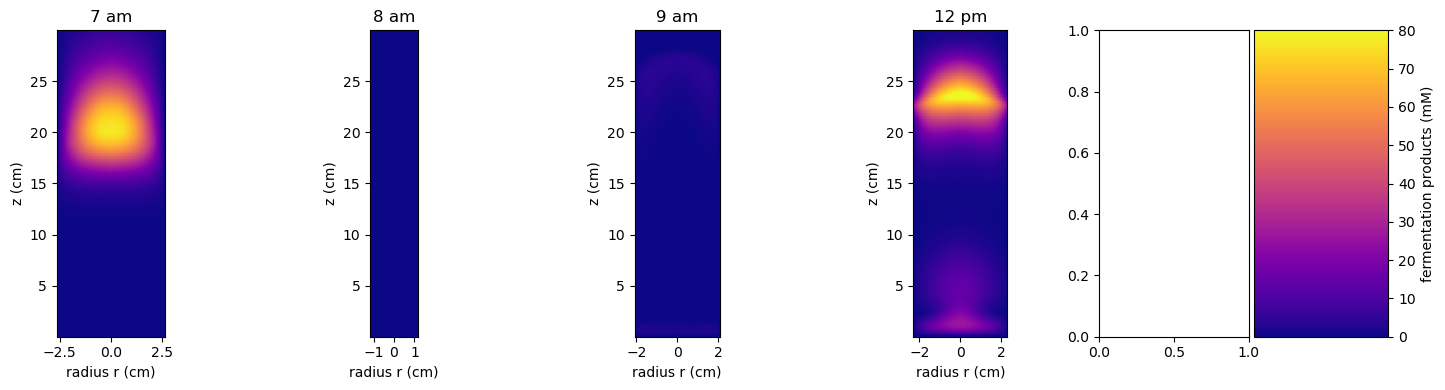

In [8]:

fig,ax=plt.subplots(1,5,figsize=(3*5,4))


for count in [1,2,3,4]:
    if count==1:
        data=pd.read_csv("./data_fromcomsol/systems_variables/26_5_SCFA_T=31.txt",skiprows=9,delimiter=";",names=["r","z","FP"])
        title="7 am"
    elif count==2:
        data=pd.read_csv("./data_fromcomsol/systems_variables/26_5_SCFA_T=32.txt",skiprows=9,delimiter=";",names=["r","z","FP"])
        title="8 am"
    elif count==3:
        data=pd.read_csv("./data_fromcomsol/systems_variables/26_5_SCFA_T=33.txt",skiprows=9,delimiter=";",names=["r","z","FP"])
        title="9 am"
    elif count==4:
        data=pd.read_csv("./data_fromcomsol/systems_variables/26_5_SCFA_T=36.txt",skiprows=9,delimiter=";",names=["r","z","FP"])
        title="12 pm"
    else:
        error
        
    z=data["z"]*100.
    r=data["r"]*100.

    rbf = scipy.interpolate.Rbf(z,r,data["FP"], function='linear')


    
    vmax=80
    extent=[-1*r.max(),r.max(),z.min(),z.max()]

    cmap="viridis"
    cmap="plasma"
    #cmap="plasma_r"

    zi, ri = np.linspace(z.min(), z.max(), 100),np.linspace(r.min(), r.max(), 120) #prepare grid for interpolation
    zi, ri = np.meshgrid(zi, ri) #prepare grid for interpolation

    #get data interpolotaed in grid format
    curgrid=rbf(zi,ri)
    mirroredcur=np.append(curgrid[::-1,:],curgrid,axis=0)
    mirroredcur=np.transpose(mirroredcur)

    aspect = 1./2.#.15 / (0.35 * 0.9*r.max()) #for wider plot smaller value
    im = ax[count-1].imshow(mirroredcur, origin='lower',
                                     extent=extent, aspect=aspect,cmap=cmap,vmin=0,vmax=vmax)

    ax[count-1].set_xlabel("radius r (cm)")
    ax[count-1].set_ylabel("z (cm)")
    ax[count-1].set_title(title)

                        
from mpl_toolkits.axes_grid1 import make_axes_locatable
divider = make_axes_locatable(ax[4])
cax=divider.append_axes('right', size='90%', pad=0.05)
#divider.append_axes('right', size='60%', pad=0.1)

cb2 = fig.colorbar(im, cax=cax, orientation="vertical")
cb2.set_label("fermentation products (mM)")

fig.tight_layout()

fig.savefig("plot_outputs/fp_snapshots.pdf")

# plot number of cells in cecum

26_12


,D,M1,lambda,time,c2,c3
0,1.000000e-08,1,0.000056,0.000000,0.001110,0.000037
1,1.000000e-08,1,0.000056,0.166667,0.000857,0.000030
2,1.000000e-08,1,0.000056,0.333333,0.000798,0.000029
3,1.000000e-08,1,0.000056,0.500000,0.000759,0.000029
4,1.000000e-08,1,0.000056,0.666667,0.000727,0.000029
...,...,...,...,...,...,...
1727,1.000000e-08,1,0.000417,71.333333,-0.000001,0.000140
1728,1.000000e-08,1,0.000417,71.500000,-0.000001,0.000136
1729,1.000000e-08,1,0.000417,71.666667,-0.000001,0.000133
1730,1.000000e-08,1,0.000417,71.833333,-0.000001,0.000129


unique D
[1.e-08]
5.555555555555556e-05
0.0001388888888888889
0.0002777777777777778
0.0004166666666666667
26_13


,D,M1,lambda,time,c2,c3
0,1.000000e-08,1,0.000278,0.000000,0.001109,3.703866e-05
1,1.000000e-08,1,0.000278,0.166667,0.000436,1.836877e-05
2,1.000000e-08,1,0.000278,0.333333,0.000142,7.712361e-06
3,1.000000e-08,1,0.000278,0.500000,0.000040,2.839665e-06
4,1.000000e-08,1,0.000278,0.666667,0.000010,9.645521e-07
...,...,...,...,...,...,...
428,1.000000e-08,1,0.000278,71.333333,0.000355,8.290187e-58
429,1.000000e-08,1,0.000278,71.500000,0.000302,2.180205e-57
430,1.000000e-08,1,0.000278,71.666667,0.000258,6.275239e-57
431,1.000000e-08,1,0.000278,71.833333,0.000221,1.939748e-56


unique D
[1.e-08]
0.0002777777777777778
26_14


,D,M1,lambda,time,c2,c3
0,1.000000e-09,1,0.000278,0.000000,0.001109,0.000037
1,1.000000e-09,1,0.000278,0.166667,0.000822,0.000035
2,1.000000e-09,1,0.000278,0.333333,0.000730,0.000040
3,1.000000e-09,1,0.000278,0.500000,0.000645,0.000046
4,1.000000e-09,1,0.000278,0.666667,0.000553,0.000054
...,...,...,...,...,...,...
1727,1.000000e-06,1,0.000278,71.333333,0.000530,0.000270
1728,1.000000e-06,1,0.000278,71.500000,0.000002,0.000316
1729,1.000000e-06,1,0.000278,71.666667,0.000002,0.000312
1730,1.000000e-06,1,0.000278,71.833333,0.000002,0.000309


unique D
[1.e-09 1.e-08 1.e-07 1.e-06]
0.0002777777777777778


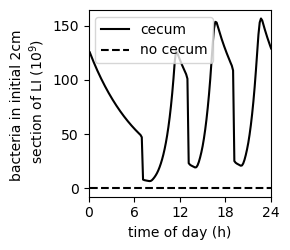

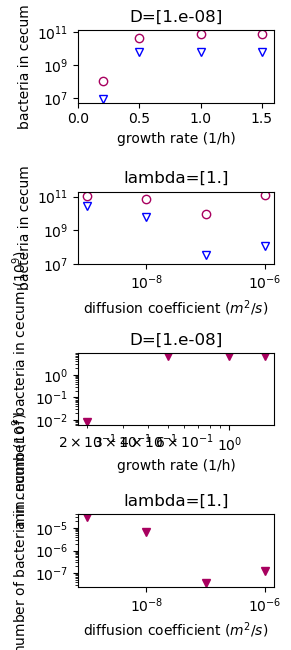

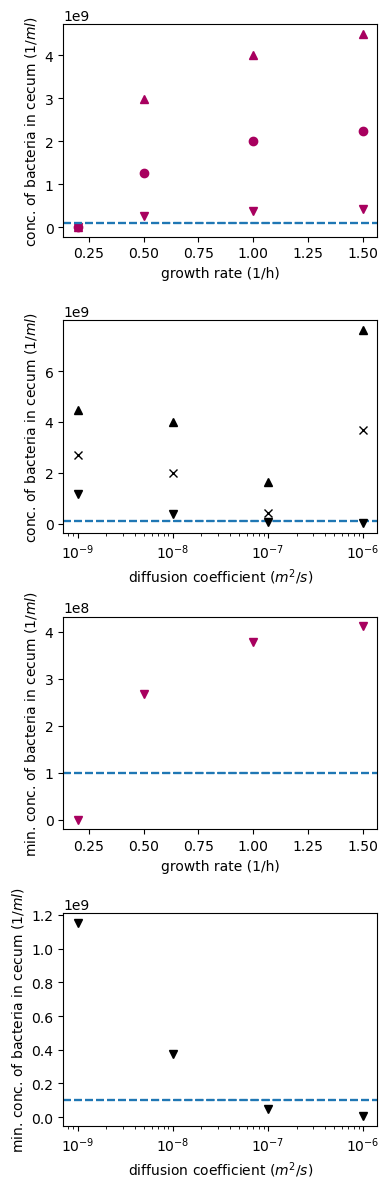

In [17]:

#different SCFA simuations

name_runs=["26_12","26_13","26_14"]#,"26_7_SCFA"]
#"26_12","26_13","26_12","26_13",


#plot over time, comparison with and without cecum for fixed D and lambda
fig2, ax2 = plt.subplots(1,1,figsize=(3,2.6)) # its for the plots: 1 row and 3 panels in 1 row (figure size in cm)
#ax2.set_ylim(0,180)

#to plot 
fig3, ax3 = plt.subplots(4,1,figsize=(3,3*2.2))

#to plot average concentrations
fig4, ax4 = plt.subplots(4,1,figsize=(4,3*4))

ax3[0].set_xlim([0,1.6])
nc=-1
for name in name_runs:
        nc=nc+1
        #load data
        name_withoutsimple=name
        print(name_withoutsimple)
        systemsvarfolder="data_fromcomsol/systems_variables"
        if "SCFA" in name:
            #fix later
            names=["D","M1","time","c2","c3","c4"]
            #influx=pd.read_csv(os.path.join(systemsvarfolder,name_withoutsimple+"_Influx_c2_c3_c4.txt"), delim_whitespace=True,skiprows=5,names=names,index_col=False)
            #outflux=pd.read_csv(os.path.join(systemsvarfolder,name_withoutsimple+"_Outflux_c2_c3_c4.txt"), delim_whitespace=True,skiprows=5,names=names,index_col=False)
            total=pd.read_csv(os.path.join(systemsvarfolder,name_withoutsimple+"_Total_c2_c3_c4.txt"), delim_whitespace=True,skiprows=5,names=names,index_col=False)    
            names_abs=["D","M1","time","c4"]
            absorption=pd.read_csv(os.path.join(systemsvarfolder,name_withoutsimple+"_Absorption.txt"), delim_whitespace=True,skiprows=5,names=names_abs,index_col=False)
        elif name in ["26_12","26_13","26_14"]:  #these runs have growth rate
            names=["D","M1","lambda","time","c2","c3"]
            #influx=pd.read_csv(os.path.join(systemsvarfolder,name_withoutsimple+"_Influx_c2_c3.txt"), delim_whitespace=True,skiprows=5,names=names,index_col=False)
            #outflux=pd.read_csv(os.path.join(systemsvarfolder,name_withoutsimple+"_Outflux_c2_c3.txt"), delim_whitespace=True,skiprows=5,names=names,index_col=False)
            #total=pd.read_csv(os.path.join(systemsvarfolder,name_withoutsimple+"_Total_c2_c3.txt"), delim_whitespace=True,skiprows=5,names=names,index_col=False)
            total_CECUM=pd.read_csv(os.path.join(systemsvarfolder,name_withoutsimple+"_Total_In_Cecum_c2_c3.txt"), delim_whitespace=True,skiprows=5,names=names,index_col=False)
            if name in ["26_14","26_12"]:
                average_CECUM=pd.read_csv(os.path.join(systemsvarfolder,name_withoutsimple+"_Average_In_Cecum_c2_c3.txt"), delim_whitespace=True,skiprows=5,names=names,index_col=False)
            
            
        else:       
            ERROR
            #names=["D","M1","time","c2","c3"]
            #influx=pd.read_csv(os.path.join(systemsvarfolder,name_withoutsimple+"_Influx_c2_c3.txt"), delim_whitespace=True,skiprows=5,names=names,index_col=False)
            #outflux=pd.read_csv(os.path.join(systemsvarfolder,name_withoutsimple+"_Outflux_c2_c3.txt"), delim_whitespace=True,skiprows=5,names=names,index_col=False)
            #total=pd.read_csv(os.path.join(systemsvarfolder,name_withoutsimple+"_Total_c2_c3.txt"), delim_whitespace=True,skiprows=5,names=names,index_col=False)
        
        #if name in ["simpleformat_26_1_M1","simpleformat_26_1_M0"]:
        #    influx=pd.read_csv("data_fromcomsol/systems_variables_June2023/Simulation"+name_withoutsimple+"Influx_c2_c3.txt", delim_whitespace=True,skiprows=5,names=names,index_col=False)
        #    outflux=pd.read_csv("data_fromcomsol/systems_variables_June2023/Simulation"+name_withoutsimple+"Outflux_c2_c3.txt", delim_whitespace=True,skiprows=5,names=names,index_col=False)
        #    total=pd.read_csv("data_fromcomsol/systems_variables_June2023/Simulation"+name_withoutsimple+"Total_c2_c3.txt", delim_whitespace=True,skiprows=5,names=names,index_col=False)    
        

        display(total_CECUM)
        
        colorlist=["g","b","r","m"]
        
        
        ax3[0].set_xlabel("growth rate (1/h)")
        ax3[0].set_ylabel("bacteria in cecum")
        ax3[1].set_xlabel("diffusion coefficient ($m^2/s$)")
        ax3[1].set_ylabel("bacteria in cecum")
        #ax3[0].set_xscale("log")
        ax3[1].set_xscale("log")
        ax3[0].set_yscale("log")
        ax3[1].set_yscale("log")
        
        
        ax3[2].set_xlabel("growth rate (1/h)")
        ax3[2].set_ylabel("min. number of bacteria in cecum ($10^9$)")
        ax3[3].set_xlabel("diffusion coefficient ($m^2/s$)")
        ax3[3].set_ylabel("min. number of bacteria in cecum ($10^9$)")
        ax3[2].set_xscale("log")
        ax3[2].set_yscale("log")
        ax3[3].set_xscale("log")
        ax3[3].set_yscale("log")
        
        #average concentr4ations
        ax4[0].set_xlabel("growth rate (1/h)")
        ax4[0].set_ylabel("conc. of bacteria in cecum ($1/ml$)")
        ax4[1].set_xlabel("diffusion coefficient ($m^2/s$)")
        ax4[1].set_ylabel("conc. of bacteria in cecum ($1/ml$)")
        ax4[1].set_xscale("log")
        
        ax4[2].set_xlabel("growth rate (1/h)")
        ax4[2].set_ylabel("min. conc. of bacteria in cecum ($1/ml$)")
        ax4[3].set_xlabel("diffusion coefficient ($m^2/s$)")
        ax4[3].set_ylabel("min. conc. of bacteria in cecum ($1/ml$)")
        ax4[3].set_xscale("log")
        #plot radius
        #m^3/s to l/h
        conversionBacNumbers=np.power(10.,6.) #unit in Comsol is OD m^3, using 1 ODml =10^9 and 1m^3 = 10^6 ml we get a conversion factor fo 10^15
        conversionBacConcentrations=np.power(10.,9.) #concentration unit
        conversionBacConcentrations2=np.power(10.,15.) #
        conversion=1#3600*1000
        nD=-1
        print("unique D")
        print(total_CECUM["D"].unique())
        for l in total_CECUM["lambda"].unique().tolist():
            
            nD=nD+1
            print(l)
            
            
            select=total_CECUM.loc[(total_CECUM["lambda"]==l) & (total_CECUM["time"]>48)]
            
            
            
            if l==0.0002777777777777778:
                
                #plot for one growth rate and D
                ax2.set_xlabel("time of day (h)")
                ax2.set_ylabel("bacteria in initial 2cm \n section of LI $(10^9)$")
                if name=="26_13":
                    ax2.plot(select["time"],conversionBacNumbers*select["c3"],ls='--',marker='',color="k",label="no cecum")
                elif name=="26_12":
                    ax2.plot(select["time"],conversionBacNumbers*select["c3"],ls='-',marker='',color="k",label="cecum")
            
            if name=="26_12":
                selectConc=average_CECUM.loc[(average_CECUM["lambda"]==l)  & (average_CECUM["time"]>48)]
                ax3[0].set_title("D="+str(total_CECUM["D"].unique()))
                ax3[2].set_title("D="+str(total_CECUM["D"].unique()))
                #conversionBacNumbers
                ax3[0].plot(l*3600,conversionBacConcentrations2*select["c3"].mean(),ls='',marker='o',color="#a8005f",mfc='none')
                ax3[0].plot(l*3600,conversionBacConcentrations2*select["c3"].min(),ls='',marker='v',color="b",mfc='none')
        
                #ax3[0].plot(l*3600,conversionBacNumbers*select["c3"].max(),ls='',marker='^',color="k")
                #ax3[0].plot(l*3600,conversionBacNumbers*select["c3"].min(),ls='',marker='v',color="k")
                ax3[2].plot(l*3600,conversionBacNumbers*select["c3"].min(),ls='',marker='v',color="#a8005f")
        
                ax4[0].plot(l*3600,conversionBacConcentrations*selectConc["c3"].mean(),ls='',marker='o',color="#a8005f")
                ax4[0].plot(l*3600,conversionBacConcentrations*selectConc["c3"].max(),ls='',marker='^',color="#a8005f")
                ax4[0].plot(l*3600,conversionBacConcentrations*selectConc["c3"].min(),ls='',marker='v',color="#a8005f")
                ax4[2].plot(l*3600,conversionBacConcentrations*selectConc["c3"].min(),ls='',marker='v',color="#a8005f")
                
                
                ax4[0].axhline(np.power(10.,8),ls='--')
                ax4[1].axhline(np.power(10.,8),ls='--')
           
        #plot diffusion
        nD=-1
        for D in total_CECUM["D"].unique().tolist():
            nD=nD+1
            select=total_CECUM.loc[total_CECUM["D"]==D]
            
            if name=="26_14":
                selectConc=average_CECUM.loc[(average_CECUM["D"]==D)  & (average_CECUM["time"]>48)]
                ax3[1].set_title("lambda="+str(total_CECUM["lambda"].unique()*3600))
                ax3[3].set_title("lambda="+str(total_CECUM["lambda"].unique()*3600))
                #ax3[1].set_xticks(np.power(10.,-9.)*np.array([1,10,100,1000]))
                ax3[1].plot(D,conversionBacConcentrations2*select["c3"].mean(),ls='',marker='o',color="#a8005f",mfc='none')
                ax3[1].plot(D,conversionBacConcentrations2*select["c3"].min(),ls='',marker='v',color="b",mfc='none')
                
                #ax3[1].plot(D,conversionBacNumbers*select["c3"].max(),ls='',marker='^',color="#a8005f")
                #ax3[1].plot(D,conversionBacNumbers*select["c3"].min(),ls='',marker='v',color="k")
                ax3[3].plot(D,1*select["c3"].min(),ls='',marker='v',color="#a8005f")
                
                #
                
                ax4[1].plot(D,conversionBacConcentrations*selectConc["c3"].mean(),ls='',marker='x',color="k")
                ax4[1].plot(D,conversionBacConcentrations*selectConc["c3"].max(),ls='',marker='^',color="k")
                ax4[1].plot(D,conversionBacConcentrations*selectConc["c3"].min(),ls='',marker='v',color="k")
                ax4[3].plot(D,conversionBacConcentrations*selectConc["c3"].min(),ls='',marker='v',color="k")
                
                ax4[2].axhline(np.power(10.,8),ls='--')
                ax4[3].axhline(np.power(10.,8),ls='--')
                
        #average number in 
        
        #ax2[0].axhline(conversion*total["c4"].mean(),ls='--',color=colorlist[nc])
        ax3[0].set_yticks([np.power(10.,7),np.power(10.,9),np.power(10.,11)])
        ax3[1].set_yticks([np.power(10.,7),np.power(10.,9),np.power(10.,11)])
        

#ax2[0].set_ylabel("inflow (l/h)")
#ax2[0].set_xticks([0,6,12,18,24])
#f#or m in meal:
#    ax2[0].axvline(m,ls='--',color='r')
        
#ax3[0].set_ylim(0,100)
#ax3[1].set_ylim(0,150)
    
ax2.legend()
ax2.set_xticks([48,54,60,66,72])
ax2.set_xticklabels([0,6,12,18,24])
ax2.set_xlim(48,72)

#ax2[0].set_xlim(0,24)    
fig2.tight_layout()
fig2.savefig("plot_outputs/cecum_trends.pdf", dpi=150)
    
fig3.tight_layout()
fig3.savefig("plot_outputs/cecum_total_varwithgrowth_diffusion.pdf", dpi=150)
        
    

fig4.tight_layout()
fig4.savefig("plot_outputs/cecum_concent_varwithgrowth_diffusion.pdf", dpi=150)
        #PRINT

In [5]:
# Kymographs for cecum figure 4

,R,z,u,M1,D,t,r,c2,w,c3
0,0.008465,0.300000,-5.143613e-10,1,1.000000e-08,45.167,0.018492,0.033333,-4.639488e-08,5.752000
1,0.008608,0.299463,5.983030e-08,1,1.000000e-08,45.167,0.018805,0.033351,-4.572410e-08,5.751458
2,0.008751,0.298925,1.201750e-07,1,1.000000e-08,45.167,0.019118,0.033369,-4.505331e-08,5.750917
3,0.008810,0.300000,1.071767e-09,1,1.000000e-08,45.167,0.019248,0.033501,-7.195826e-08,5.759881
4,0.008954,0.299463,6.141643e-08,1,1.000000e-08,45.167,0.019561,0.033519,-7.128747e-08,5.759339
...,...,...,...,...,...,...,...,...,...,...
12870487,0.009300,0.001564,2.011128e-07,1,1.000000e-06,59.000,0.021583,52.473579,-7.132394e-09,3.174696
12870488,0.009290,0.002160,2.019478e-07,1,1.000000e-06,59.000,0.021559,52.461170,-6.905717e-09,3.175106
12870489,0.009313,0.000389,1.964932e-07,1,1.000000e-06,59.000,0.021612,52.485257,-3.387281e-09,3.174405
12870490,0.008755,0.000383,1.987895e-07,1,1.000000e-06,59.000,0.020317,52.487495,-3.399637e-09,3.174514


/var/folders/4b/8dffvbfs5qs93rh77f2zxs340000gn/T/ipykernel_1317/331524860.py:269: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout(h_pad=0.1)


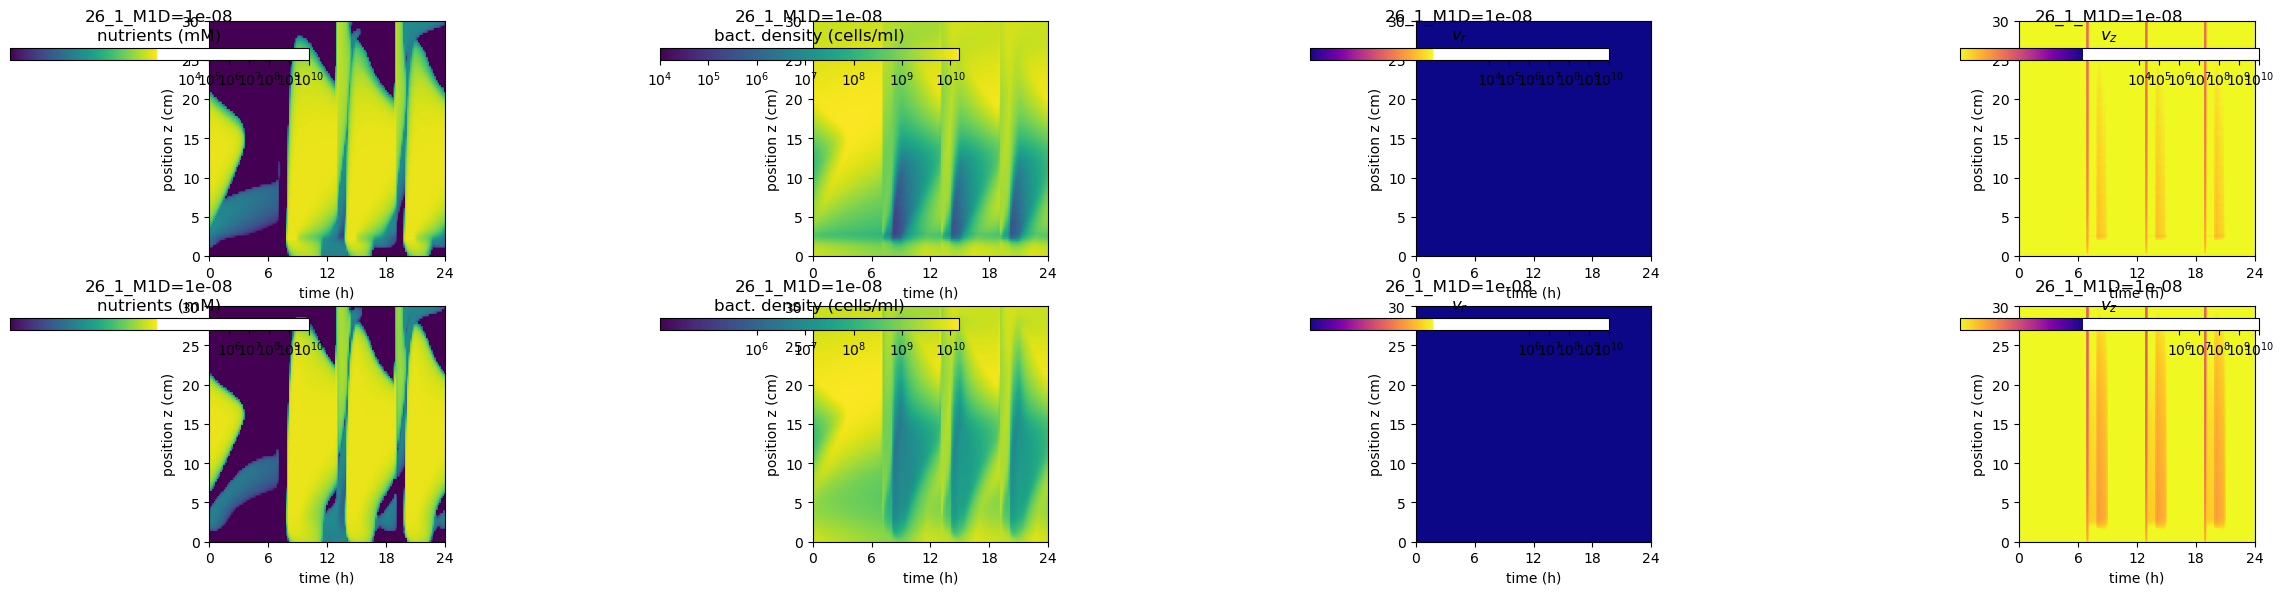

,R,z,r,M1,D,t,u,w,c2,c3
0,0.008460,0.300000,0.022147,1,1.000000e-06,51.333,-3.956291e-10,-8.018706e-08,0.043317,8.929140e+00
1,0.008617,0.299464,0.022558,1,1.000000e-06,51.333,4.481122e-08,-7.745590e-08,0.043316,8.929096e+00
2,0.008774,0.298928,0.022969,1,1.000000e-06,51.333,9.001806e-08,-7.472474e-08,0.043316,8.929052e+00
3,0.008809,0.300000,0.023059,1,1.000000e-06,51.333,8.445518e-10,-8.900706e-08,0.043317,8.929169e+00
4,0.008966,0.299464,0.023470,1,1.000000e-06,51.333,4.605140e-08,-8.627590e-08,0.043317,8.929125e+00
...,...,...,...,...,...,...,...,...,...,...
12678235,0.009321,0.003750,0.025472,1,1.000000e-09,55.000,-1.652486e-04,4.740589e-05,0.003785,-1.375485e-52
12678236,0.009317,0.004375,0.025461,1,1.000000e-09,55.000,-1.639281e-04,4.575928e-05,0.005019,-1.942251e-52
12678237,0.009328,0.002500,0.025490,1,1.000000e-09,55.000,-1.688551e-04,5.463693e-05,0.002382,-5.131773e-53
12678238,0.009325,0.003125,0.025481,1,1.000000e-09,55.000,-1.670519e-04,5.102141e-05,0.003084,-9.443313e-53


/var/folders/4b/8dffvbfs5qs93rh77f2zxs340000gn/T/ipykernel_1317/331524860.py:269: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout(h_pad=0.1)


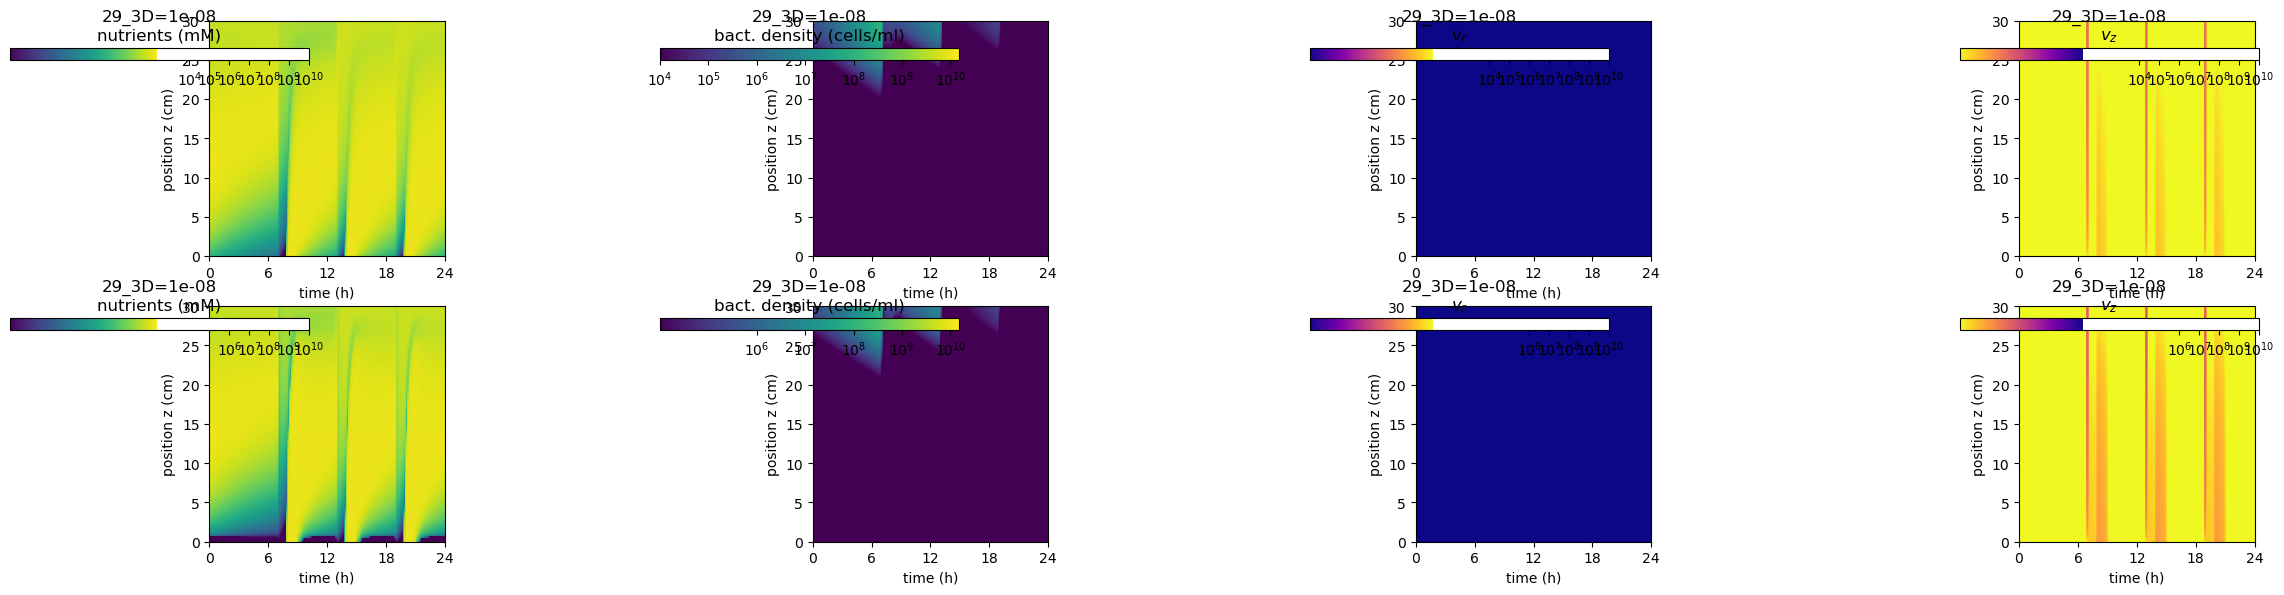

In [32]:
#mode="linear" #"linear, log"


namerunlist=["26_1_M1","29_3"]
D_unique=[0,np.power(10.,-8)]
#namerunlist=["26_5_SCFA","26_4_SCFA","26_3_SCFA"]#,"26_1_M0","30_1_M0","30_1_M1","27_1","28_1","29_3","29_4"]
#Dindexlist=[0]
#namerunlist=["26_1_M1","29_3"]
Dindexlist=[1]

#namerunlist=["26_3_SCFA","26_4_SCFA"] #can put several simulations here as list ,30_1_M0"
#Dindexlist=[0] #for SCFA, only one D value per simulation

#namerunlist=["30_1_M0","30_1_M1"]#,"27_1","28_1","29_3","29_4"]

#for plots where several timepoints are shown
timepoints=[10,20,30,40] #set timepoints to plot
colorlistdiffD=["r","b","g","m"]

#which variables should be shown
if ("26_3_SCFA" in namerunlist) or ("26_4_SCFA" in namerunlist) or ("26_5_SCFA" in namerunlist):
    varnames=["c2","c3","c4","u","w"]
    varnames_long=["nutrients (mM)","bact. density (cells/ml)","SCFA (mM)","$v_{r}$","$v_{z}$"]
    varnames_flux=["nutrients (mol/s)","bacteria (g/s)","SCFA (mol)","$v_{r}$","$v_{z}$"]
    varnames_total=["nutrients (mol)","bact. density (cells/ml)","SCFA (mol)","$v_{r}$","$v_{z}$"]
    variables=["c2","c3","c4"]  
else:
    varnames=["c2","c3","u","w"]
    varnames_long=["nutrients (mM)","bact. density (cells/ml)","$v_{r}$","$v_{z}$"]
    varnames_flux=["nutrients (mol/s)","bacteria (g/s)","$v_{r}$","$v_{z}$"]
    varnames_total=["nutrients (mol)","bacteria (g)","$v_{r}$","$v_{z}$"]
    variables=["c2","c3"]
    

colorvariables=["b","r","m","orange"]

#set in which folder output should be stored
foldername_outbase="plot_outputs"
if not os.path.exists(foldername_outbase):
               os.makedirs(foldername_outbase)        

#names of folders in which data is stored
foldername_data="data_simpleformat"
foldername_kymograph="data_kymographs"





for name in namerunlist:
    for mode in ["log"]:
        #read in file (simple format)
            
        shortname=name#name[-5:]
        data=pd.read_csv(os.path.join(foldername_data,name+".txt"))
        display(data)

#         #get unique values:
#         t_unique=data["t"].unique()
#         t_unique.sort()
#         r_unique=data["r"].unique()
#         r_unique.sort()
#         z_unique=data["z"].unique()
#         z_unique.sort()
#         D_unique=data["D"].unique()
#         D_unique.sort()
#         M1_unique=data["M1"].unique()
#         M1_unique.sort()

#         #display unique values
#         print("t values")
#         display(t_unique)
#         print("r values")
#         display(len(r_unique))
#         print("z values")
#         display(len(z_unique))
#         print("D values")
#         display(D_unique)
#         print("M1 values")
#         display(M1_unique)


        for Dindex in Dindexlist: #go through all diffusion values
            
            runname=shortname+"D="+str(D_unique[Dindex])
            
            #load corresponding kymograph data
            picklename=name+"_D"+str(Dindex)+'calculateddata.pickle'
            with open(os.path.join("data_kymographs",picklename), 'rb') as handle:
                data_calculated = pickle.load(handle)
        
            foldername=os.path.join(foldername_outbase,"kymograph_cecumfigure_"+mode+"_"+name+"_D"+str(Dindex))
            
            

#             #find for all variables the min and max values (to manaint same ranges across plots)
#             var_list_min_global=[]
#             var_list_max_global=[]
#             for var in varnames:
#                 var_list=select[var].values
#                 var_list_min_global.append(var_list.min())
#                 var_list_max_global.append(var_list.max())
#             #print(var_list_min_global)
#             #print(valr_list_max_global)

#             #if you want to set plotting range by hand for full profile plots
#             var_list_min_manual=[0,-10,-0.00001,-0.00002]/
#             var_list_max_manual=[30,200,0.00001,0.0002]


            fig, ax = plt.subplots(2,len(varnames),figsize=(26,6)) # its for the plots: 1 row and 3 panels in 1 row (figure size in cm)
                    #wighsize width and height
            divider=[]
            cax=[]
            cax2=[]

            #plot for every variable
            for iV in range(0,len(varnames)):
                    #decide which range for z values to use
                    # if 3>4: #local min and max
                    #     vmin=var_list_min[iV]
                    #     vmax=var_list_max[iV]
                    # elif 3>2: #global min and max
                    #     vmin=var_list_min_global[iV]
                    #     vmax=var_list_max_global[iV]
                    # else: #manual 
                    #vmin=var_list_min_manual[iV]
                    #vmax=var_list_max_manual[iV]

                    #choose colormap
                    #chose colormap here: https://matplotlib.org/stable/tutorials/colors/colormaps.html
                    if iV<2:
                        cmap="viridis"
                    elif iV==2:
                        cmap="plasma"
                    else:
                        cmap="plasma_r"
                        #cmap="cividis"
                    conversionbactconc=np.power(10.,9.)
                    ###################
                    #plot kymographs
                    if mode=="linear":
                        imK = ax[0,iV].imshow(data_calculated["kymo_radav_"+varnames[iV]], origin='lower',extent=[data_calculated["z"].min()*100, data_calculated["z"].max()*100,data_calculated["time"].min(), data_calculated["time"].max()], aspect=0.2,cmap=cmap)
                        imK2 = ax[1,iV].imshow(data_calculated["kymo_centerline_"+varnames[iV]], origin='lower',extent=[data_calculated["z"].min()*100, data_calculated["z"].max()*100,data_calculated["time"].min(), data_calculated["time"].max()], aspect=0.2,cmap=cmap)
                       
                        #else:
                        #    imK = ax[0,iV].imshow(kymograph_lists[iV], vmin=vmin, vmax=vmax, origin='lower',
                        #        extent=[z.min()*100, z.max()*100,t_unique.min(), t_unique.max()], aspect=0.2,cmap=cmap)
                        #    vmin=vmin*0.0001, vmax=vmax*0.1
                    elif mode=="log":
                        lower=0.00001
                        if iV==0:
                            upper=250
                        elif iV==1: #bacteria
                            upper=15*conversionbactconc
                            lower=0.00001*conversionbactconc
                        else:
                            upper=15
                        
                        aspect=0.8#2 #1.2
                        extent=[data_calculated["time"].min(), data_calculated["time"].max(),data_calculated["z"].min()*100, data_calculated["z"].max()*100]
                        
                        curarray=np.transpose(data_calculated["kymo_radav_"+varnames[iV]])
                        curarray[curarray <0.00001] = 0.00001
                        if iV==1:
                            curarray=curarray*conversionbactconc
                        
                        imK = ax[0,iV].imshow(curarray, origin='lower',norm=matplotlib.colors.LogNorm(vmin=lower, vmax=upper), extent=extent, aspect=aspect,cmap=cmap)
                        curarray=np.transpose(data_calculated["kymo_centerline_"+varnames[iV]])
                        curarray[curarray <0.00001] = 0.00001
                        if iV==1:
                            curarray=curarray*conversionbactconc
                        imK2 = ax[1,iV].imshow(curarray, origin='lower',norm=matplotlib.colors.LogNorm(vmin=lower, vmax=upper), extent=extent, aspect=aspect,cmap=cmap)
                        
                    
                    
#                     elif mode=="log":
#                         if iV==0: #nutrients
#                             lower=0.001
#                             upper=250
#                             curarray=kymograph_lists[iV]
#                             curarray[curarray <lower] = lower
#                             imK = ax[0,iV].imshow(kymograph_lists[iV], norm=matplotlib.colors.LogNorm(vmin=lower, vmax=upper), origin='lower',
#                                 extent=[z.min()*100, z.max()*100,t_unique.min(), t_unique.max()], aspect=0.2,cmap=cmap)
#                         elif iV==1: #bacteria
#                             lower=0.001
#                             upper=15
#                             curarray=kymograph_lists[iV]
#                             curarray[curarray <0] = 0
#                             imK = ax[0,iV].imshow(kymograph_lists[iV], norm=matplotlib.colors.LogNorm(vmin=lower, vmax=upper), origin='lower',
#                                 extent=[z.min()*100, z.max()*100,t_unique.min(), t_unique.max()], aspect=0.2,cmap=cmap)
#                         else: #velocities
#                             imK = ax[0,iV].imshow(kymograph_lists[iV], vmin=vmin*0.0001, vmax=vmax*0.1, origin='lower',
#                                 extent=[z.min()*100, z.max()*100,t_unique.min(), t_unique.max()], aspect=0.2,cmap=cmap)
#                         #or try symlog norm
#                             #imK = ax[0,iV].imshow(kymograph_lists[iV],  norm=matplotlib.colors.SymLogNorm(vmax*0.01,vmin=vmin, vmax=vmax), origin='lower',
#                             #    extent=[z.min()*100, z.max()*100,t_unique.min(), t_unique.max()], aspect=0.2,cmap=cmap)
                            
                    ax[0,iV].set_xlabel("time (h)")
                    ax[0,iV].set_ylabel("position z (cm)")
                    ax[1,iV].set_xlabel("time (h)")
                    ax[1,iV].set_ylabel("position z (cm)")
                    
                    ax[0,iV].set_xlim(48,72)
                    ax[1,iV].set_xlim(48,72)
                    ax[1,iV].set_xticks([48,54,60,66,72])
                    ax[1,iV].set_xticklabels([0,6,12,18,24])
                    ax[0,iV].set_xticks([48,54,60,66,72])
                    ax[0,iV].set_xticklabels([0,6,12,18,24])
                    
                    #ax[0,iV].axhline(t_cur,ls='--',color='w')
                    ####################
                    #add colorbar
                    width = 0.115
                    height = 0.02
                    vertical_position = 0.9
                    horizontal_position = 0.25*iV+0.03
                    
                    #divider = make_axes_locatable(ax[0,iV])
                    #cax.append(divider.append_axes('right', size='60%', pad=0.1))
                    #cax.append(plt.axes([horizontal_position, vertical_position, width, height])) #the new axis for first colorbar
                    cax.append(plt.axes([horizontal_position, vertical_position, width, height])) #the new axis for first colorbar
                    cb2 = fig.colorbar(imK, cax=cax[-1], orientation="horizontal")
                    cax[-1].set_title(runname+'\n'+varnames_long[iV])
                    cb2.set_ticks(np.power(10.,6.)*np.array([0.01,0.1,1,10,100,1000,10000]))
                    
                    vertical_position = 0.45
                    #divider2 = make_axes_locatable(ax[0,iV])
                    #cax2.append(divider2.append_axes('right', size='60%', pad=0.1))
                    cax2.append(plt.axes([horizontal_position, vertical_position, width, height])) #the new axis for first colorbar
                    #cax.append(plt.axes([horizontal_position, vertical_position, width, height])) #the new axis for first colorbar
                    cb22 = fig.colorbar(imK2, cax=cax2[-1], orientation="horizontal")
                    cb22.set_ticks(np.power(10.,6.)*np.array([1,10,100,1000,10000]))
                    

                    cax2[-1].set_title(runname+'\n'+varnames_long[iV])
                    
                    
                    
                    #cax[-1].set_yticks([])
                    #cax[-1].minorticks_off()

                    #adjustment of tick locations for SymLogNorm
                    #SymLogNorm needs adjustment of axes
                            #https://stackoverflow.com/questions/11138706/colorbar-for-imshow-centered-on-0-and-with-symlog-scale
                    #need to fix
                    #if 3>5 and mode=="log" and iV in [2,3]:
                    #    maxlog=int(np.ceil( np.log10(vmax) ))
                    #    minlog=int(np.ceil( np.log10(-vmin) ))
                    #    #generate logarithmic ticks 
                    #    tick_locations=([-(10**x) for x in xrange(minlog,-logthresh-1,-1)]
                    #        +[0.0]
                    #        +[(10**x) for x in xrange(-logthresh,maxlog+1)] )
                    #    cax[-1].set_xticks(tick_locations)

                    #plt.colorbar(im,cax=axColor,orientation='horizontal')

                    #ax[1,iV].set_ylim(0,25)
                    #axColor.yaxis.set_label_position('left')
                    #axColor.yaxis.set_ticks_position('left')

                    

                #plt.show()


                    #fig.colorbar(im, ax=ax[1,iV])
                #fig.tight_layout()
            plt.tight_layout(h_pad=0.1)
            #timefilename=str(tcount).zfill(3)+".png"

            fig.savefig(foldername+".pdf", dpi=150)
            plt.show()

In [35]:
#plot bacterial abundance -different runs